## Лабораторная работа №3


Ступак Дмитрий
Б03-207

#### Постановка задачи

Провести  вычисления  предложенным  методом  с  заданной  точностью,  либо  с заданным шагом интегрирования

### Вариант 17

Вычислить решение задачи:

$$
y'' - 100y = x e^x,\quad 0 < x < b
$$

с начальными условиями:

$$
y(0) = 1,\quad y(b) = 3
$$

используя метод  сведения к задачам Коши  для  системы  2-х  ур-ий 1-го порядка/задачи Коши решать каким-либо методом 2-го  порядка точности:

Расчеты провести для:
$b = 0.3$ и $b = 0.6$
$h = 0.01,\ 0.005,\ 0.0025$

Представить: 
- постановку задачи;
- теоретическое описание метода, расчетные формулы;
- таблицу расчетных данных;  
- сравнение полученного решения с точным решением (если оно известно);
- графики (полученное решение + точное решение на одном графике);
- апостериорную (по расчетным данным, полученным с разными шагами интегрирования) оценку погрешности найденного решения;
- выводы;
- код (Приложение).


In [12]:
import numpy as np
import matplotlib.pyplot as plt

### 1. Сведение к системе ОДУ первого порядка

Введем замену переменных:
- $y_1 = y$ (искомая функция)
- $y_2 = y'$ (ее производная)

Получаем систему:

$$
\begin{cases}
y_1' = y_2 \\
y_2' = 100y_1 + xe^x
\end{cases}
$$

In [13]:
def f1(x, y1, y2):
    return y2

def f2(x, y1, y2):
    return 100 * y1 + x * np.exp(x)

# Метод Рунге-Кутты 2-го порядка (модифицированный Эйлер)

Для численного решения задачи Коши:

$$y'(x) = f(x, y), \quad y(x_0) = y_0$$

используется метод:

$$k_1 = hf(x_n, y_n)$$
$$k_2 = hf(x_n + h, y_n + k_1)$$
$$y_{n+1} = y_n + \frac{1}{2}(k_1 + k_2)$$

Применяем этот метод к системе:

$$\begin{cases}
y_1' = f_1(x, y_1, y_2) = y_2 \\
y_2' = f_2(x, y_1, y_2) = 100y_1 + xe^x
\end{cases}$$

In [14]:
def rk2_system(x0, y1_0, y2_0, h, b):
    N = int((b - x0) / h)
    x = np.linspace(x0, b, N + 1)
    y1 = np.zeros(N + 1)
    y2 = np.zeros(N + 1)

    y1[0] = y1_0
    y2[0] = y2_0

    for i in range(N):
        k1_y1 = h * f1(x[i], y1[i], y2[i])
        k1_y2 = h * f2(x[i], y1[i], y2[i])

        k2_y1 = h * f1(x[i] + h, y1[i] + k1_y1, y2[i] + k1_y2)
        k2_y2 = h * f2(x[i] + h, y1[i] + k1_y1, y2[i] + k1_y2)

        y1[i+1] = y1[i] + 0.5 * (k1_y1 + k2_y1)
        y2[i+1] = y2[i] + 0.5 * (k1_y2 + k2_y2)

    return x, y1

## Метод стрельбы (секущих)

Пусть $y_1(a) = s$ -- неизвестный начальный наклон

Решая эту задачу Коши при различных значениях s, мы подбираем такое значение, при котором $y_1(b) = 3$

Итерационная формула для нахождения начального наклона $s$:
$$s_{n+1} = s_n - F(s_n) \cdot \frac{s_n - s_{n-1}}{F(s_n) - F(s_{n-1})}$$

где:
$$F(s) = y_1(b; s) - 3$$

In [15]:
def shooting_method(b, h, y0, yb, s0, s1, tol=1e-6, max_iter=100):
    def F(s):
        _, y1 = rk2_system(0, y0, s, h, b)
        return y1[-1] - yb

    for _ in range(max_iter):
        F0 = F(s0)
        F1 = F(s1)
        if abs(F1) < tol:
            break
        s2 = s1 - F1 * (s1 - s0) / (F1 - F0)
        s0, s1 = s1, s2

    x, y1 = rk2_system(0, y0, s1, h, b)
    return x, y1, s1

In [16]:
y0 = 1
yb = 3
hs = [0.01, 0.005, 0.0025]
bs = [0.3, 0.6]

results = {}

for b_val in bs:
    results[b_val] = {}
    for h_val in hs:
        x, y, slope = shooting_method(b=b_val, h=h_val, y0=y0, yb=yb, s0=0, s1=10)
        results[b_val][h_val] = (x, y, slope)

In [17]:
results

{0.3: {0.01: (array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
          0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
          0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 ]),
   array([1.        , 0.93450466, 0.87833039, 0.83091809, 0.7917961 ,
          0.76057545, 0.73694601, 0.72067337, 0.71159653, 0.70962629,
          0.71474435, 0.72700314, 0.74652634, 0.77351013, 0.80822513,
          0.85101911, 0.90232046, 0.96264248, 1.03258846, 1.11285776,
          1.20425275, 1.30768682, 1.42419349, 1.55493675, 1.70122266,
          1.86451235, 2.04643667, 2.24881237, 2.47366033, 2.72322562,
          3.        ]),
   np.float64(-7.04953353763754)),
  0.005: (array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
          0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
          0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
          0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 

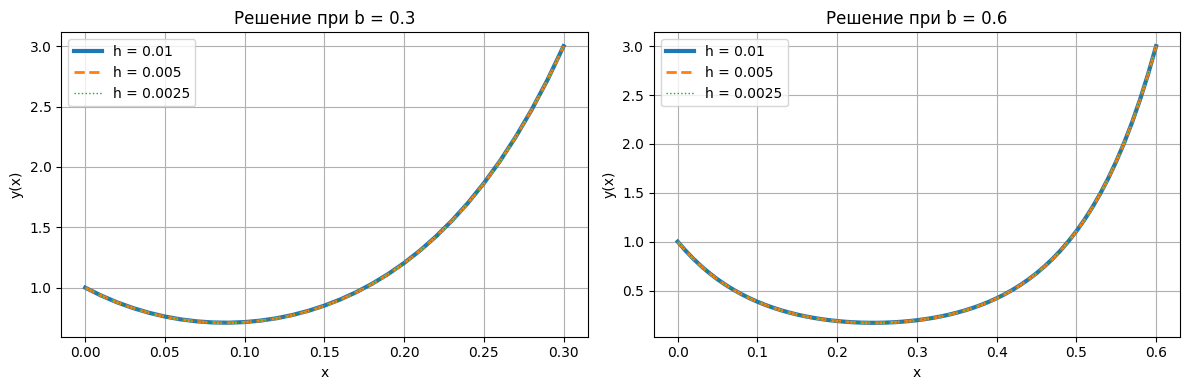

In [30]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
lw = [3, 2, 1]
ls=['-', '--', ':']
for i, b_val in enumerate(bs):
    ax = axs[i]
    for j, h_val in enumerate(hs):
        x, y, _ = results[b_val][h_val]
        ax.plot(x, y, 
                linestyle=ls[j],
                linewidth=lw[j],
                label=f"h = {h_val}")
    ax.set_title(f"Решение при b = {b_val}")
    ax.set_xlabel("x")
    ax.set_ylabel("y(x)")
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

In [39]:
def estimate_error(results, hs, bs):
    for b in bs:
        x1, y1 = results[b][hs[1]][:2]
        x2, y2 = results[b][hs[2]][:2]
        err = np.max(np.abs(y2 - np.interp(x2, x1, y1)))
        print(f"b={b}: ошибка между разными значениями h: error = {err:.2e}")

estimate_error(results, hs, bs)

b=0.3: ошибка между разными значениями h: error = 9.39e-04
b=0.6: ошибка между разными значениями h: error = 9.39e-04


## Вывод

В ходе работы была решена краевая задача второго порядка, сведённая к системе ОДУ первого порядка. Использован метод Рунге-Кутты второго порядка точности и метод стрельбы с подбором начального наклона.

погрешность вычислений оказалась меньше $10^{-3}$, что говорит о точности данного метода

Таким образом, поставленная задача решена корректно